 # <div  style="color:#303030;font-family:'arial blACK', sans-serif,monospace; text-align: center; padding: 50px 0; vertical-align:middle;" > <img src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/_Resources/Images/Lightbulb.png?raw=true" style=" background:#00a0e4;border-radius:10px;width:150px;text-align:left; margin-left:10%"  /> <span style="position:relative; bottom:70px; margin-left:5%">    Analog to Digital Conversion - ADC </span> </div>

# <span style='color:#484848;'> B005 Analog-to-Digital Conversion (ADC) </span>

### <span style='color:#00aba1;'> Keywords </span>
``` Analog to Digital Conversion (ADC)```, ```Digital Signal Processing (DSP)```, ```Embedded Systems```

### <span style='color:#00aba1;'> Notebook Info </span>

**Contributors(s):** Afonso Raposo, Joana Pinto, Prof. Hugo Silva

**Date of creation:** dd/mm/aa

**Last update:** 2021

# I. Introduction
<br>
<div class="title"style="width:100%; background:#00a0e4;font-family:'arial black',monospace; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" >  </div>

## <div style="color:#00a0e4"> 1. Background </div>

### <div style="color:#00a0e4"> The Analog World</div>

Any physical quantity that varies with time, space or any independent variable, can be defined as a signal. As they exist in the world, signals have a representation in any infinitely small portion of time, hence being designated as continuous. 

However, computational systems (either embedded - like the Arduino - or not) are only capable of dealing with binary representations (e.g. does a pin have voltage or not?). These are defined as digital signals; as you've seen in the previous lab while working with digital ports, the microcontroller translates 0V to binary 0 and 5V to binary 1. But how can one represent a voltage of 2.5V (e.g.)?

The process of reducing a continuous signal to a discrete signal is defined as sampling, and has the goal of retrieving a digitally manageable numerical representation of the underlying process with a given numerical precision. 

This session aims at further understanding this fundamental process.

#### <div style="color:#00a0e4"> What is the ADC?</div>

The Analog to Digital Converter (ADC) of an embedded system is a peripheral capable of converting an analog voltage applied as an input to a pin, to a digital representation. This is done by mapping the voltage to a set of digital codes represented using a finite number of bits. 

In the example of the digital port (1-bit) we represent the input voltage at the pin with a set of two discrete levels $[0, 1]$. Expanding the number of bits, also increases our representation space. For example using two bits, if we consider all the possible states ($00$, $01$, $11$, $10$) we have a representation space of four discrete levels, i.e. $[0, 1, 2, 3]$). 

In a more general form, the representation space will have $2^n$ discrete levels, with $n$ being the resolution of the ADC (typically a fixed setting).

ADCs can vary greatly between microcontroller. The ADC on the Arduino has $n=10$-bit ADC meaning it has the ability to map the analog input voltage to $1024$ ($2^{10}$) discrete levels. Other microcontrollers have $12$-bit ADCs ($2^{12} = 4096$ discrete levels) and some have $16$-bit ADCs ($2^{16} = 65536$ discrete levels).

On the Seeeduino board, the ADC pins have an `A` as a prefix of their label ($A0$ through $A7$), to indicate these pins can read analog voltages.

<img src="https://botland.store/img/art/inne/14993_2.jpg" width="500" border="0">
<div style="width: 210px; height: 50px; outline: 5px solid #00ff00; position: absolute; bottom:12%; left:45%;"/>

#### <div style="color:#00a0e4"> Relating ADC Value to Voltage</div>

The ADC reports a ratiometric value. This means that the ADC assumes 5V is 1023 ($2^n-1$, given that discrete levels start at zero) and anything less than 5V will be a ratio between 5V and 1023, given by:

$\frac{2^n-1}{V_{dd}}=\frac{ADC_i}{V_i}$ 

where $V_{dd}$ is the operating voltage of the circuit, $V_i$ is the input voltage, and $ADC_i$ is the discrete level assigned by the ADC to the input voltage. Assuming a $10$-bit ADC and a system voltage of 5V, it becomes:

$\frac{1023}{5}=\frac{ADC_i}{V_i}$ 

<!--img src="https://cdn.sparkfun.com/assets/3/9/0/b/6/51140300ce395f777e000002.png" width="500" border="0"-->

<!--img src="https://cdn.sparkfun.com/assets/4/0/2/7/9/5114021dce395f827d000002.png" width="400" border="0"-->

This way, you can easily correspond the ADC reading obtained with the Arduino ($ADC_i$) to the input analog voltage (V_i).

To read an analog voltage on the A0 pin of the Arduino board, you can use the default example, `Examples > 01.Basics > ReadAnalogVoltage`:

```cpp
// the setup routine runs once when you press reset:
void setup() {
  // initialize serial communication at 9600 bits per second:
  Serial.begin(9600);
}

// the loop routine runs over and over again forever:
void loop() {
  // read the input on analog pin 0:
  int sensorValue = analogRead(A0);
  // Convert the analog reading (which goes from 0 - 1023) to a voltage (0 - 5V):
  float voltage = sensorValue * (5.0 / 1023.0);
  // print out the value you read:
  Serial.println(voltage);
}
```

<div style="background:#62d321;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; "> Explore </span> <br>
  <div style="background:#c5e8b0;font-size:12px"> 
      You can learn more about ADCs at:
      <br><a href="https://learn.sparkfun.com/tutorials/analog-to-digital-conversion">https://learn.sparkfun.com/tutorials/analog-to-digital-conversion</a>      
</div>

### <div style="color:#00a0e4">Serial Communication</div>

Embedded systems often communicate with other digital circuits (e.g. computers or other embedded systems). For those individual circuits to exchange information between one another, they must communicate in a way that both can understand, i.e. use what is known as a communication protocol.

The Universal Asynchronous Receiver/Transmitter (UART), also known as "serial", is a common communication protocol found in embedded systems. It has been designed with a number of built-in mechanisms that help ensure robust data transfer between two digital systems, namely:

- Baud rate
- Data bits
- Synchronization bits
- Parity bits

#### <div style="color:#00a0e4">Baud Rate</div>

The baud rate specifies how fast data is sent over a serial line. It is usually expressed in units of bits-per-second (bps). If you invert the baud rate, you can find out just how long it takes to transmit a single bit.

"Standard" baud are 1200, 2400, 4800, 19200, 38400, 57600, and 115200 bps, however, other speeds can be used. The only requirement to ensure communication, is that both devices are configured to operate at the same rate. The higher the baud rate, the faster data is sent/received

<div style="background:#fe9b29; font-family:'arial', monospace;text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; "> Caution! </span> <br>
  <div style="background:#ffdab0;padding-left: 5px; font-size:12px"> 
    The baud rates is an important configuration when two devices are communication using the serial protocol. If a receiver is not decoding data at the same rate it was sent by the transmitter, generally the data will be garbled. If you don't see any data on the receiver or the decoded data is not what you expect, check to make sure that the baud rates match up.
</div>

#### <div style="color:#00a0e4">Framing the Data</div>

Each block of data transmitted from your arduino, is actually sent in a frame or sequence of bits (usually a byte). To enable a receiver to segment the transmitted data, frames (which can also be known as packets) are delimited by appending synchronization and parity bits of known value to the transmitted data.

<img src="https://cdn.sparkfun.com/r/700-700/assets/f/9/c/0/2/50d2066fce395fc43b000000.png" width="500" border="0">

Let's explore each of these frame pieces:

#### <div style="color:#00a0e4">Data Chunk</div>

Block corresponding to the data to be transmit. The amount of data in each packet can be configure to a number of bits ranging from 5 to 9.


#### <div style="color:#00a0e4">Synchronization bits</div>

The synchronization bits are two or three special bits transferred with each chunk of data. They are the start bit and the stop bit(s). True to their name, these bits mark the beginning and end of a packet. There's always only one start bit, but the number of stop bits is configurable to either one or two (though it's commonly left at one).


#### <div style="color:#00a0e4">Parity bits</div>

Parity is a form of very simple, low-level error checking. It comes in two flavors: odd or even. To produce the parity bit, all 5-9 bits of the data byte are added up, and the evenness of the sum decides whether the bit is set or not.

<div style="background:#62d321;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; "> Explore </span> <br>
  <div style="background:#c5e8b0;font-size:12px"> 
      Learn more about Serial Communication at:
      <br><a href="https://learn.sparkfun.com/tutorials/serial-communication">https://learn.sparkfun.com/tutorials/serial-communication</a>      
</div>

## <div style="color:#00a0e4"> 2. Objectives</div>
* Understand the process of converting an analog signal to a digital representation
* Analyze the effect of data types in the throughput of your embedded system
* Learn about profiling and accurate time keeping in devices with limited resources


## <div style="color:#00a0e4"> 3. Materials </div>
* Arduino IDE
* 1x Breadboard
* 2x 10kOhm resistors
* 1x TMP36 temperature (TMP) sensor
* 1x Arduino (or analogous device)
* 1x USB cable

<div style="background:#00bfc2;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Note </span> <br>
  <div style="background:#9eddde;font-size:12px"> 
    Supplementary data files are provided here:
      <br>
      <a href="https://drive.google.com/drive/folders/1Xju0-vw1S6gjKG7wXGeIR4XMT48tFMum?usp=sharing">https://drive.google.com/drive/folders/1Xju0-vw1S6gjKG7wXGeIR4XMT48tFMum?usp=sharing</a>
      <br>
      Use them <b>only</b> if you're not able to gather your own data.
</div>

# II. Experimental
<br>
<div style="width:100%; background:#00a0e4;color:#282828;font-family:'arial black'; text-align: center; padding: 7px 0; border-radius: 5px 50px; margin-top:-15px" > </div>

Consider the Resistive Voltage Divider represented in the following figure. Assemble the circuit on a breadboard, powering it from your Arduino, and connect the analog output of the circuit to an analog input of your choice. 

<img src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/_Resources/Images/A.Signal_Acquisition_IMG/a013/Resistive_Divider.png?raw=true" width="400" border="0">

The following firmware allows to sample the analog inputs at a configurable sampling rate and stream them through the serial port, together with the elapsed time since the board began running the program. A formatted sequence of comma-separated values (CSV) is used (e.g. &lt;TIME&gt;, &lt;A&gt;). 

Data streaming can be started and stopped on demand, by a command sent to the firmware through the serial port. Confirm the overall operation of the setup using the Arduino IDE Serial Monitor.

**Commands:**

- `S` - starts and stops the acquisition.

- `F100` - sets the sampling frequency to 100 Hz. Another natural number value can be used.

```cpp
bool state=false;
int f=100, dt=0;
char command;
unsigned long t=0, lt=0; 

void setup() {
  // initialize the serial communication:
  Serial.begin(9600);
  dt=int(1000*1/(float)f);
}

void loop() {
  if (Serial.available()) {
    command = Serial.read();
    switch (command) {
      case 'S': 
        state=!state;
        break;
      case 'F':
        f=Serial.parseInt();
        Serial.println(f);
        dt=int(1000*1/(float)f);
        break;
    }
    lt=millis();
  }
  if (state) {
    t=millis();
    if ((t-lt)>=dt) {
      Serial.print(t);
      Serial.print(",");
      Serial.print(analogRead(A0));
      Serial.print("\n");
      lt=t;
    }
  }
}
```

# III. Explore
<br>
<div class='h1'  style="width:100%; background:#00a0e4;color:#282828;font-family:'arial black'; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" > </div>

## <div style="color:#00a0e4">  1. Quizz </div>

**1.** Explain what the following blocks of code do:

    a) 
```cpp
    bool state=false;
    int f=100, dt=0;
    char command;
    unsigned long t=0, lt=0; 
```

    b) 
```cpp
    void setup() {
      Serial.begin(9600);
      dt=int(1000*1/(float)f);
    }
```

    c) 
```cpp
    void loop() {
      if (Serial.available()) {
        command = Serial.read();
        switch (command) {
          case 'S': 
            state=!state;
            break;
          case 'F':
            f=Serial.parseInt();
            Serial.println(f);
            dt=int(1000*1/(float)f);
            break;
        }
        lt=millis();
      }
      ...
    }
```

    d) 
```cpp
    void loop() {
      ...
      if (state) {
        t=millis();
        if ((t-lt)>=dt) {
          Serial.print(t);
          Serial.print(",");
          Serial.print(analogRead(A0));
          Serial.print("\n");
          lt=t;
        }
      }
    }
```

**2.** Considering the operating voltage of your Arduino and the resolution of the Analog-to-Digital Converter (ADC), determine the **expected range of quantization steps** produced by the ADC and the corresponding **mV/step**, as well as the **discrete level assigned to the analog output** of the voltage divider. Using the provided firmware, **analyze** the output of the **experimental circuit**; describe and comment your experimental findings in light of your theoretical calculations.
<br>

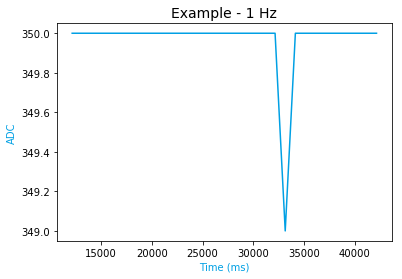

In [1]:
# Example: 1 Hz

import pylab as pl
import matplotlib.pyplot as plt

fname = './data/L2.1-1Hz-9600bps.csv'

raw = pl.loadtxt(fname, delimiter = ',')

col_1 = raw[:, 0]
col_2 = raw[:, 1]

plt.title('Example - 1 Hz', {'size':14})

plt.xlabel('Time (ms)', color = "#00a0e4")
plt.ylabel('ADC', color = "#00a0e4")

plt.plot(col_1, col_2, color = "#00a0e4")

plt.show()

**3.** Configure the sampling rate on your firmware to 1Hz and the serial port baud rate to 9600bps, start the data acquisition and stop it after a couple of seconds. Derive the sampling period from the experimental data, and comment the results using statistical metrics to support your discussion. Repeat the experiment for sampling rates of 10Hz, 100Hz, and 1000Hz. You can use any software/programming language of your preference to analyze your results.
<br>

**TIP:** To facilitate the analysis, you can select all the content of the Arduino IDE Serial Monitor, copy it and paste the copied data to a spreadsheet (e.g. Excel); if the data is not automatically split into columns, save the data as a plaintext CSV file and load it.
<br>

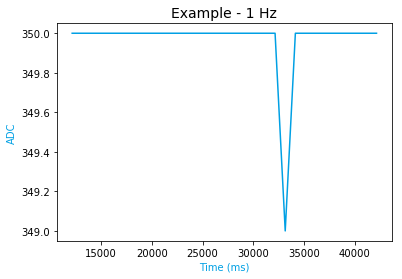

In [2]:
# Example: 1 Hz

fname = './data/L2.2-1Hz-9600bps.csv'

raw = pl.loadtxt(fname, delimiter = ',')

col_1 = raw[:, 0]
col_2 = raw[:, 1]

plt.title('Example - 1 Hz', {'size':14})

plt.xlabel('Time (ms)', color = "#00a0e4")
plt.ylabel('ADC', color = "#00a0e4")

plt.plot(col_1, col_2, color = "#00a0e4")

plt.show()

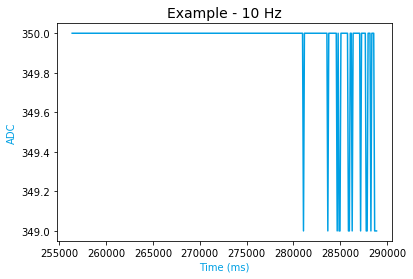

In [3]:
# Example: 10 Hz
fname = './data/L2.2-10Hz-9600bps.csv'

raw = pl.loadtxt(fname, delimiter = ',')

col_1 = raw[:, 0]
col_2 = raw[:, 1]

plt.title('Example - 10 Hz', {'size':14})

plt.xlabel('Time (ms)', color = "#00a0e4")
plt.ylabel('ADC', color = "#00a0e4")

plt.plot(col_1, col_2, color = "#00a0e4")

plt.show()

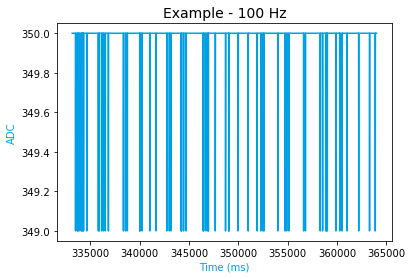

In [4]:
# Example: 100 Hz
fname = './data/L2.2-100Hz-9600bps.csv'

raw = pl.loadtxt(fname, delimiter = ',')

col_1 = raw[:, 0]
col_2 = raw[:, 1]

plt.title('Example - 100 Hz', {'size':14})

plt.xlabel('Time (ms)', color = "#00a0e4")
plt.ylabel('ADC', color = "#00a0e4")

plt.plot(col_1, col_2, color = "#00a0e4")

plt.show()

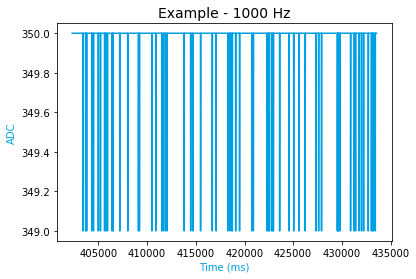

In [5]:
# Example: 1000 Hz
fname = './data/L2.2-1000Hz-9600bps.csv'

raw = pl.loadtxt(fname, delimiter = ',')

col_1 = raw[:, 0]
col_2 = raw[:, 1]

plt.title('Example - 1000 Hz', {'size':14})

plt.xlabel('Time (ms)', color = "#00a0e4")
plt.ylabel('ADC', color = "#00a0e4")

plt.plot(col_1, col_2, color = "#00a0e4")

plt.show()

**4.** With the sampling rate on your firmware set to 100Hz and the serial port baud rate to 300bps, start the data acquisition and stop it after a couple of seconds. Derive the sampling period from the experimental data, and comment the results using statistical metrics to support your discussion. Repeat the experiment for a baud rate of 115200bps.


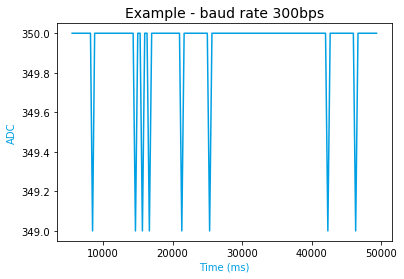

In [6]:
# Example: 100 Hz; baud rate 300bps
fname = './data/L2.3-100Hz-300bps.csv'

raw = pl.loadtxt(fname, delimiter = ',')

col_1 = raw[:, 0]
col_2 = raw[:, 1]

plt.title('Example - baud rate 300bps', {'size':14})

plt.xlabel('Time (ms)', color = "#00a0e4")
plt.ylabel('ADC', color = "#00a0e4")

plt.plot(col_1, col_2, color = "#00a0e4")

plt.show()

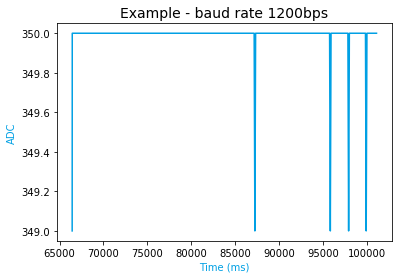

In [7]:
# Example: 100 Hz; baud rate 1200bps
fname = './data/L2.3-100Hz-1200bps.csv'

raw = pl.loadtxt(fname, delimiter = ',')

col_1 = raw[:, 0]
col_2 = raw[:, 1]

plt.title('Example - baud rate 1200bps', {'size':14})

plt.xlabel('Time (ms)', color = "#00a0e4")
plt.ylabel('ADC', color = "#00a0e4")

plt.plot(col_1, col_2, color = "#00a0e4")

plt.show()

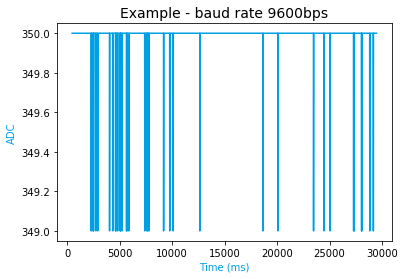

In [8]:
# Example: 100 Hz; baud rate 9600bps
fname = './data/L2.3-100Hz-9600bps.csv'

raw = pl.loadtxt(fname, delimiter = ',')

col_1 = raw[:, 0]
col_2 = raw[:, 1]

plt.title('Example - baud rate 9600bps', {'size':14})

plt.xlabel('Time (ms)', color = "#00a0e4")
plt.ylabel('ADC', color = "#00a0e4")

plt.plot(col_1, col_2, color = "#00a0e4")

plt.show()

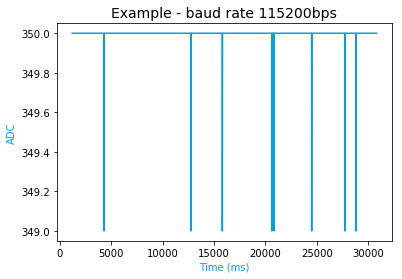

In [9]:
# Example: 100 Hz; baud rate 115200bps
fname = './data/L2.3-100Hz-115200bps.csv'

raw = pl.loadtxt(fname, delimiter = ',')

col_1 = raw[:, 0]
col_2 = raw[:, 1]

plt.title('Example - baud rate 115200bps', {'size':14})

plt.xlabel('Time (ms)', color = "#00a0e4")
plt.ylabel('ADC', color = "#00a0e4")

plt.plot(col_1, col_2, color = "#00a0e4")

plt.show()

##  <div style="color:#00a0e4;">  2. Beyond the Lab </div>

This section is not mandatory and will not influence the evaluation of the lab. These are suplementary exercises designed for those who wish to explore and learn more about Arduino-based systems.

**1.** Consider the Analog Devices TMP36 temperature (TMP) sensor represented in the following figure. Assemble the circuit on a breadboard, powering it from your Arduino, and connect the analog output to an analog input of your choice. Expand the firmware to, in addition to the data already sent, sample and stream also the TMP sensor data. With the sampling rate on your firmware set to 100Hz and the baud rate set to 9600bps, compare how sending the TMP data as raw ADC digital codes and as ºC affects the execution time.

The measurement range for the Analog Devices TMP36 sensor used in this assembly is [-40; 125]ºC, has an offset of 0.5V (the sensor outputs 0.5V when it's at 0ºC), and the scale factor is 10mV/ºC [1].

<img src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/_Resources/Images/A.Signal_Acquisition_IMG/a013/Setup TMP36.png?raw=true" width="600" border="0">

                        TMP36 sensor. GND: 0V; 3V3: 3.3V power supply; A: Analog output.

<div style="background:#fe9b29; font-family:'arial', monospace;text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Caution! </span> <br>
  <div style="background:#ffdab0;font-size:12px"> 
BE CAREFUL when connecting the temperature sensor to the breadboard; it has a specific position and CAN BE DAMAGED IF WRONGLY CONNECTED. <b>Triple check</b> your wiring before powering up the system, and check if the sensor is overheating.
</div>
</div>

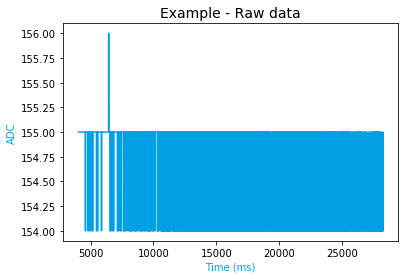

In [10]:
# Example: 100 Hz; baud rate 9600bps; RAW data
fname = './data/L2.4-100Hz-9600bps-raw.csv'

raw = pl.loadtxt(fname, delimiter = ',')

col_1 = raw[:, 0]
col_2 = raw[:, 1]

plt.title('Example - Raw data', {'size':14})

plt.xlabel('Time (ms)', color = "#00a0e4")
plt.ylabel('ADC', color = "#00a0e4")

plt.plot(col_1, col_2, color = "#00a0e4")

plt.show()

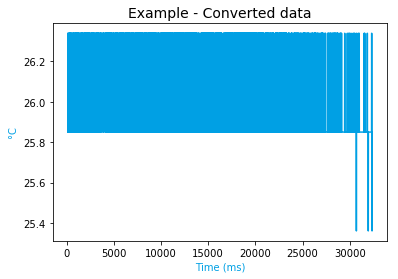

In [14]:
# Example: 100 Hz; baud rate 9600bps; converted data
fname = './data/L2.4-100Hz-9600bps-converted.csv'

raw = pl.loadtxt(fname, delimiter = ',')

col_1 = raw[:, 0]
col_2 = raw[:, 1]

plt.title('Example - Converted data', {'size':14})

plt.xlabel('Time (ms)', color = "#00a0e4")
plt.ylabel('$\degree$C', color = "#00a0e4")

plt.plot(col_1, col_2, color = "#00a0e4")

plt.show()

## <div style="color:#00a0e4">  3. References </div>

1. https://www.tinkercad.com/dashboard?type=circuits&collection=designs
2. https://www.analog.com/media/en/technical-documentation/data-sheets/TMP35_36_37.pdf 
4. https://www.arduino.cc/reference/tr/language/functions/communication/serial/begin/ 


<div style="width: 100%; ">
<div style="background:#00a0e4;color:white;font-family:'arial', monospace; text-align: center; padding: 50px 0; border-radius:10px; height:10px; width:100%; float:left " >
<span style="font-size:12px;position:relative; top:-25px">  Please provide us your feedback <span style="font-size:14px;position:relative;COLOR:WHITE"> <a href="https://forms.gle/C8TdLQUAS9r8BNJM8">here</a>.</span></span> 
<br>
<span style="font-size:17px;position:relative; top:-20px">  Suggestions are welcome! </span> 
</div>